In [55]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test_2.csv')
train = train.interpolate(method='nearest').dropna()
test  = test.interpolate(method='nearest').fillna(0)

In [61]:
train_ft   = train.ix[:,  1: 26]
train_X    = train.ix[:, 26: 28]
train_ts_X = train.ix[:, 28:147]
train_ts_Y = train.ix[:,147:207]
train_Y1   = train.ix[:,    207]
train_Y2   = train.ix[:,    208]
train_WI   = train.ix[:,    209]
train_WD   = train.ix[:,    210]

test_ft    = test.ix[:,   1: 26]
test_X     = test.ix[:,  26: 28]
test_ts_X  = test.ix[:,  28:147]

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
def plot_ts(ts):
    plt.plot(np.array(ts))
    plt.ylabel('return')
    plt.show()

def plot_hist(a):
    plt.hist(a, bins=50, normed=True)
    plt.show()

In [229]:
# plot_hist(train_WD)

In [161]:
sub = pd.read_csv('../data/sample_submission_2.csv')

In [216]:
from sklearn.neighbors import KNeighborsRegressor

# create an KNN model
def knn(X, y):
    m = KNeighborsRegressor(n_neighbors=100, weights='distance')
    m.fit(X, y)
    return m

In [215]:
from sklearn.metrics import mean_absolute_error

def evulate(y_true, y_pred, w):
    return mean_absolute_error(y_true, y_pred, sample_weight=w)

In [234]:
m_WD = knn(train_ft, train_WD)
test_WD = m_WD.predict(test_ft)**0.5

In [218]:
m_Y1 = knn(train_ft, train_Y1)
m_Y2 = knn(train_ft, train_Y2)
test_Y1 = m1.predict(test_ft)
test_Y2 = m2.predict(test_ft)

In [235]:
# t_y1 = test_Y1 * test_WD / test_WD.mean()
# t_y2 = test_Y2 * test_WD / test_WD.mean()

# weighted median method
t_y1 = train_Y1.median() * test_WD / test_WD.mean()
t_y2 = train_Y2.median() * test_WD / test_WD.mean()

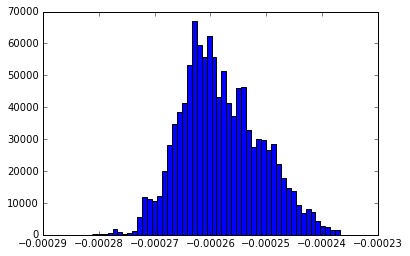

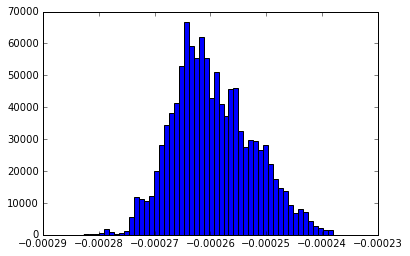

In [236]:
# plot_hist(t_y1)
# plot_hist(t_y2)

In [237]:
sub.loc[60::62,'Predicted'] = t_y1
sub.loc[61::62,'Predicted'] = t_y2

sub.to_csv('../data/my_sub.csv', index=False)